In [1]:
#!ssh-keygen -t rsa -b 4096

In [2]:
#!ssh-keyscan -t rsa github.com >> /root/.ssh/known_hosts

In [3]:
#!cat /root/.ssh/id_rsa.pub

In [4]:
#!ssh -T git@github.com

In [5]:
#!git clone git@github.com:perceptualrobots/epct.git

In [6]:
#!git clone https://github.com/perceptualrobots/pct/pct.git

In [7]:
# install of utilities to display openai environment in video
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install x11-utils  > /dev/null 2>&1

In [8]:
#!pip install jproperties
#!pip install deap

In [9]:
!pip install pct


In [10]:
import time
import gym
import math
import pct.putils as vid

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from pct.environments import MountainCarContinuousV0

from pct.architectures import LevelKey
from pct.architectures import DynamicArchitecture
from pct.structure import ArchitectureStructure


In [12]:
verbose=False
seed=66
render=True#False#True
runs=200
inputs =  [0, 1]
references =  [0.45]
top_inputs =  [0]
error_collector_type = 'ReferencedInputsError'
error_response_type = 'RootMeanSquareError'
error_properties = [['referenced_inputs','0&0.45']]
error_limit = 10
inputs_names = ['IP', 'IV']
loops = 1
history=True


In [13]:
env = MountainCarContinuousV0(name='MountainCarContinuousV0', render=render, early_termination=True)

In [14]:
move={'MountainCarContinuousV0': [-0.6, -0.5], 'Action1ws': [-0.4, -0.4], 
      'OL0C0sm': [-0.55, -0.2], 'OL0C1sm': [0, -0.2], 'OL0C2sm': [0.55, -0.2], 
      'OL1C0sm': [0, -0.1], 'IV': [-0.8, 0.05], 'IP': [-1.1, 0.5], 'CL1C0': [0, 0.1]}

arch_structure = None
modes =  {LevelKey.ZERO:6, LevelKey.N:6,LevelKey.TOP:5,LevelKey.ZEROTOP :5}
arch_structure = ArchitectureStructure(modes=modes)

In [15]:
seed = 66
raw =  [[[[1.198998468541923, 0.611754204266719, 1.7677170617308327]], [[3.4341117624938446, 0.9640180391471003], [-0.05887913748075457, 0.9825724309247841], [2.573053595563823, 0.38627004681749383]], [[1.137932637787607], [2.1164923802567945], [3.232824945210956]], [[3.0946849052258356, 3.1217341494218322, -0.45836455321778186]]], [[[0.5030156034214709]], [[3.9129702537620084, 0.4591226113143575]], [0.45]]]

plot=True
plots = [
    {'plot_items': {'IP':'ip', 'IV':'iv'},'title':'Inputs'},
    {'plot_items': {'OL0C1sm':'out1'}, 'title':'Output1'},
    {'plot_items': {'OL0C0sm':'out0', 'OL0C2sm':'out2'}, 'title':'Output'},
    {'plot_items': {'Action1ws':'act'}, 'title':'Action'}

    ]

Terminated early


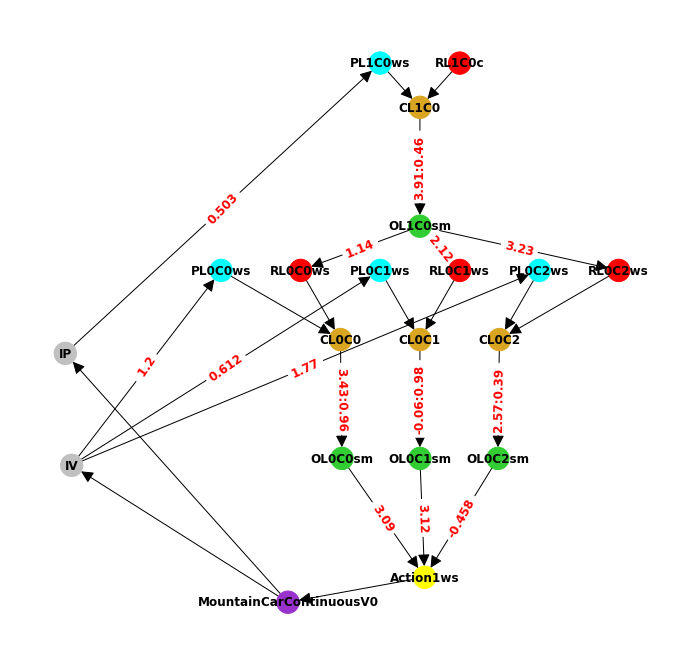

In [16]:
score, last, hpct = DynamicArchitecture.run_raw(raw=raw, arch_structure=arch_structure, move=move, 
            env=env, runs=runs, inputs=inputs, error_properties=error_properties, inputs_names=inputs_names, 
            summary=False, verbose=verbose, seed=seed, history=history, top_input_indexes=top_inputs,
            error_collector_type=error_collector_type, error_response_type=error_response_type, 
            draw=True, suffixes=True, error_limit =error_limit )


seed 66 score 0.683 last step 96


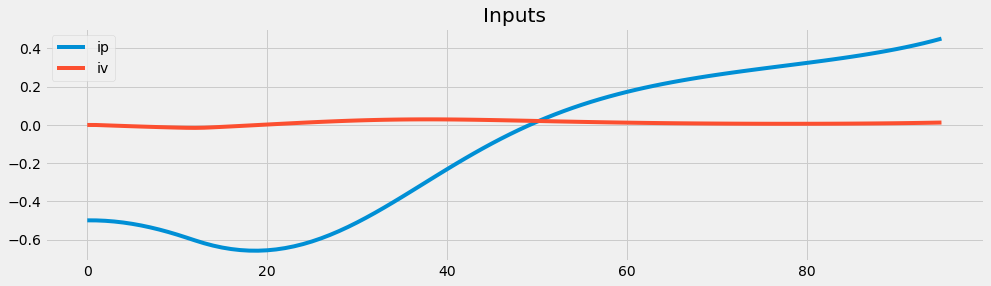

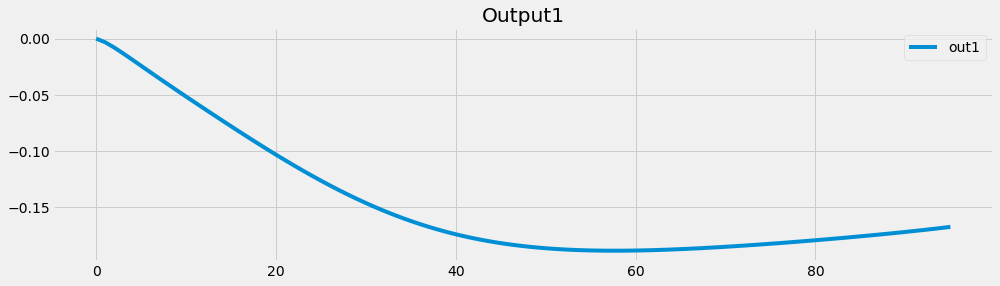

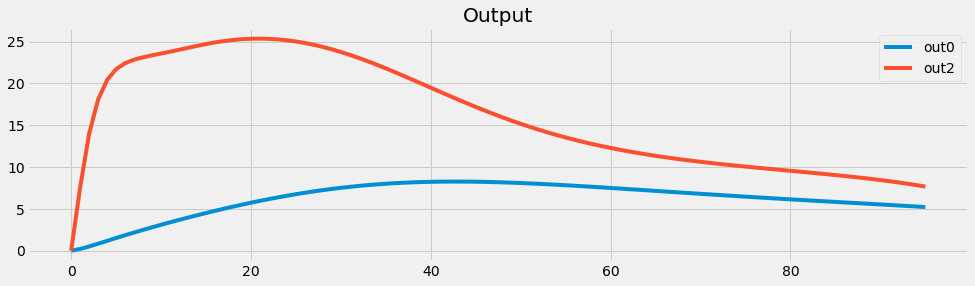

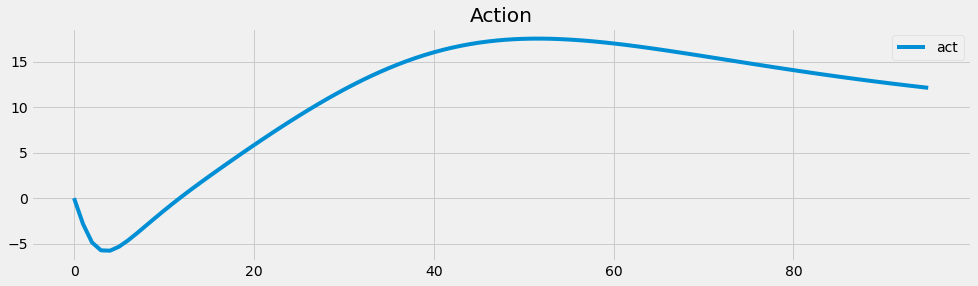

In [17]:
print(f'seed {seed} score {score:5.3f} last step {last}')

#hpct.summary()
if plot:
    for plot_item in plots:
        fig = hpct.hierarchy_plots(title=plot_item['title'], plot_items=plot_item['plot_items'])


In [18]:
env.close()

In [19]:
actions = hpct.get_history_data()['Action1ws']
last = actions[-1]
actions.append(last)


In [20]:
print(len(actions),actions)

97 [-0.00015128332075230733, -2.837016574143931, -4.870183402948793, -5.736475730288044, -5.774287690387971, -5.333171463716875, -4.647707637411552, -3.853319840597967, -3.0220152469464066, -2.1897971815812647, -1.3735036974622166, -0.5801839159171084, 0.1884771200920843, 0.9343458117729498, 1.6617152917311657, 2.3753493443060214, 3.0789561924412507, 3.774630031407691, 4.463200623385435, 5.144682151205207, 5.818595229739651, 6.484163878602305, 7.140429052754995, 7.7863135926095515, 8.420660741342452, 9.042258852688905, 9.649859134955054, 10.24219008991096, 10.81797063058852, 11.375922992695749, 11.914786083860866, 12.433329626404111, 12.93036923462101, 13.404782378365146, 13.85552500554676, 14.281648429406872, 14.682315943616976, 15.056818524186781, 15.404588925428941, 15.725213486769498, 16.018441039988012, 16.28418843664866, 16.522542389932433, 16.733757525413107, 16.91825074072541, 17.0765921644313, 17.209493163011306, 17.317791960417, 17.40243750175627, 17.46447221202897, 17.505014

In [23]:
genv = gym.make('MountainCarContinuous-v0')
genv._max_episode_steps = 4000
env = vid.wrap_env(genv)
state = env.reset()


In [24]:
for action in actions:
    obs = env.step([action])
    if obs[2]:
      break
    env.render()

env.close()

In [25]:
vid.show_video()